[Sebastian Raschka](http://sebastianraschka.com)  

- [Open in IPython nbviewer](http://nbviewer.ipython.org/github/rasbt/python_reference/blob/master/tutorials/python_data_entry_point.ipynb?create=1) 

- [Link to this IPython notebook on Github](https://github.com/rasbt/python_reference/blob/master/tutorials/python_data_entry_point.ipynb)  

- [Link to the GitHub Repository pattern_classification](http://nbviewer.ipython.org/github/rasbt/pattern_classification/blob/master/python_howtos/)

In [1]:
%load_ext watermark

In [3]:
%watermark -a 'Gopala KR' -v -d -p numpy,scipy,matplotlib,scikit-learn

Gopala KR 2018-01-28 

CPython 3.6.3
IPython 6.2.1

numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
scikit-learn 0.19.0


/srv/venv/lib/python3.6/site-packages/watermark/watermark.py:155: DeprecationWarning: Importing scikit-learn as `scikit-learn` has been depracated and will not be supported anymore in v1.7.0. Please use the package name `sklearn` instead.
  DeprecationWarning)


<font size="1.5em">[More information](http://nbviewer.ipython.org/github/rasbt/python_reference/blob/master/ipython_magic/watermark.ipynb) about the `watermark` magic command extension.</font>

<hr>
I would be happy to hear your comments and suggestions.  
Please feel free to drop me a note via
[twitter](https://twitter.com/rasbt), [email](mailto:bluewoodtree@gmail.com), or [google+](https://plus.google.com/+SebastianRaschka).
<hr>

# Entry point: Data  

### - Using Python's sci-packages to prepare data for Machine Learning tasks and other data analyses

In this short tutorial I want to provide a short overview of some of my favorite Python tools for common procedures as entry points for general pattern classification and machine learning tasks, and various other data analyses.  

<br>
<br>

# Sections

- [Installing Python packages](#Installing-Python-packages)

- [About the dataset](#About-the-dataset)

- [Downloading and saving CSV data files from the web](#Downloading-and-savin-CSV-data-files-from-the-web)

- [Reading in a dataset from a CSV file](#Reading-in-a-dataset-from-a-CSV-file)

- [Visualizating of a dataset](#Visualizating-of-a-data)

    - [Histograms](#Histograms)

    - [Scatterplots](#Scatterplots)

- [Splitting into training and test dataset](#Splitting-into-training-and-test-dataset)

- [Feature Scaling](#Feature-Scaling)

    - [Standardization](#Standardization)
    
    - [Min-Max scaling (Normalization)](#Min-Max-scaling-Normalization)

- [Linear Transformation: Principal Component Analysis (PCA)](#PCA)

- [Linear Transformation: Linear Discrciminant Analysis (LDA)](#MDA)

- [Simple Supervised Classification](#Simple-Supervised-Classification)

    - [Linear Discriminant Analysis as simple linear classifier](#Linear-Discriminant-Analysis-as-simple-linear-classifier)
    
    - [Classification Stochastic Gradient Descent (SGD)](#SGD)

- [Saving the processed datasets](#Saving-the-processed-datasets)

    - [Pickle](#Pickle)

    - [Comma Separated Values (CSV)](#Comma-Separated-Values)

<br>
<br>

## Installing Python packages

[[back to top]](#Sections)


**In this section want to recommend a way for installing the required Python-packages packages if you have not done so, yet. Otherwise you can skip this part.**

The packages we will be using in this tutorial are:

- [NumPy](http://www.numpy.org)
- [SciPy](http://www.scipy.org)
- [matplotlib](http://matplotlib.org)
- [scikit-learn](http://scikit-learn.org/stable/)

Although they can be installed step-by-step "manually", but I highly recommend you to take a look at the [Anaconda](https://store.continuum.io/cshop/anaconda/) Python distribution for scientific computing.

Anaconda is distributed by Continuum Analytics, but it is completely free and includes more than 195+ packages for science and data analysis as of today.
The installation procedure is nicely summarized here: http://docs.continuum.io/anaconda/install.html

If this is too much, the [Miniconda](http://conda.pydata.org/miniconda.html) might be right for you. Miniconda is basically just a Python distribution with the Conda package manager, which let's us install a list of Python packages into a specified `conda` environment from the Shell terminal, e.g.,

<pre>$[bash]> conda create -n myenv python=3
$[bash]> source activate myenv
$[bash]> conda install -n myenv numpy scipy matplotlib scikit-learn</pre>

When we start "python" in your current shell session now, it will use the Python distribution in the virtual environment "myenv" that we have just created. To un-attach the virtual environment, you can just use
<pre>$[bash]> source deactivate myenv</pre>

**Note:** environments will be created in ROOT_DIR/envs by default, you can use the `-p` instead of the `-n` flag in the conda commands above in order to specify a custom path.

**I find this procedure very convenient, especially if you are working with different distributions and versions of Python with different modules and packages installed and it is extremely useful for testing your own modules.**

<br>
<br>

## About the dataset

[[back to top]](#Sections)

For the following tutorial, we will be working with the free "Wine" Dataset that is deposited on the UCI machine learning repository  
(http://archive.ics.uci.edu/ml/datasets/Wine).

<br>

<font size="1">
**Reference:**  
Forina, M. et al, PARVUS - An Extendible Package for Data
Exploration, Classification and Correlation. Institute of Pharmaceutical
and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy.

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

</font>

<br>
<br>

The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample.

The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to the following 13 attributes (features):

1) Alcohol  
2) Malic acid  
3) Ash  
4) Alcalinity of ash    
5) Magnesium  
6) Total phenols  
7) Flavanoids  
8) Nonflavanoid phenols  
9) Proanthocyanins  
10) Color intensity  
11) Hue  
12) OD280/OD315 of diluted wines  
13) Proline     

An excerpt from the wine_data.csv dataset:
    
<pre>1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
[...]
2,12.37,.94,1.36,10.6,88,1.98,.57,.28,.42,1.95,1.05,1.82,520
2,12.33,1.1,2.28,16,101,2.05,1.09,.63,.41,3.27,1.25,1.67,680
[...]
3,12.86,1.35,2.32,18,122,1.51,1.25,.21,.94,4.1,.76,1.29,630
3,12.88,2.99,2.4,20,104,1.3,1.22,.24,.83,5.4,.74,1.42,530</pre>

<br>
<br>

## Downloading and saving CSV data files from the web

[[back to top]](#Sections)

Usually, we have our data stored locally on our disk in as a common text (or CSV) file with comma-, tab-, or whitespace-separated rows. Below is just an example for how you can CSV datafile from a HTML website directly into Python and optionally save it locally.

In [4]:
import csv
import urllib

url = 'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv'
csv_cont = urllib.request.urlopen(url)
csv_cont = csv_cont.read() #.decode('utf-8')

# Optional: saving the data to your local drive
with open('./wine_data.csv', 'wb') as out:
    out.write(csv_cont)

**Note:** If you'd rather like to work with the data directly in `str`ing format, you could just apply the `.decode('utf-8')` method to the data that was read in byte-format by default.


<br>
<br>

## Reading in a dataset from a CSV file

[[back to top]](#Sections)

Since it is quite typical to have the input data stored locally, as mentioned above, we will use the [`numpy.loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) function  now to read in the data from the CSV file.  
(alternatively [`np.genfromtxt()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) could be used in similar way, it provides some additional options)

In [5]:
import numpy as np

# reading in all data into a NumPy array
all_data = np.loadtxt(open("./wine_data.csv","r"),
        delimiter=",", 
        skiprows=0, 
        dtype=np.float64
        )

# load class labels from column 1
y_wine = all_data[:,0]

# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy=False)

# load the 14 features
X_wine = all_data[:,1:]

# printing some general information about the data
print('\ntotal number of samples (rows):', X_wine.shape[0])
print('total number of features (columns):', X_wine.shape[1])

# printing the 1st wine sample
float_formatter = lambda x: '{:.2f}'.format(x)
np.set_printoptions(formatter={'float_kind':float_formatter})
print('\n1st sample (i.e., 1st row):\nClass label: {:d}\n{:}\n'
          .format(int(y_wine[0]), X_wine[0]))

# printing the rel.frequency of the class labels
print('Class label frequencies')
print('Class 1 samples: {:.2%}'.format(list(y_wine).count(1)/y_wine.shape[0]))
print('Class 2 samples: {:.2%}'.format(list(y_wine).count(2)/y_wine.shape[0]))
print('Class 3 samples: {:.2%}'.format(list(y_wine).count(3)/y_wine.shape[0]))


total number of samples (rows): 178
total number of features (columns): 13

1st sample (i.e., 1st row):
Class label: 1
[14.23 1.71 2.43 15.60 127.00 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065.00]

Class label frequencies
Class 1 samples: 33.15%
Class 2 samples: 39.89%
Class 3 samples: 26.97%


<br>
<br>

## Visualizating of a dataset

[[back to top]](#Sections)

There are endless way to visualize datasets for get an initial idea of how the data looks like. The most common ones are probably histograms and scatter plots.

### Histograms

[[back to top]](#Sections)

Histograms are a useful data to explore the distribution of each feature across the different classes. This could provide us with intuitive insights which features have a good and not-so-good inter-class separation. Below, we will plot a sample histogram for the "Alcohol content" feature for the three wine classes.

In [6]:
%matplotlib inline

<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence \m
<input>:23: DeprecationWarning: invalid escape sequence 

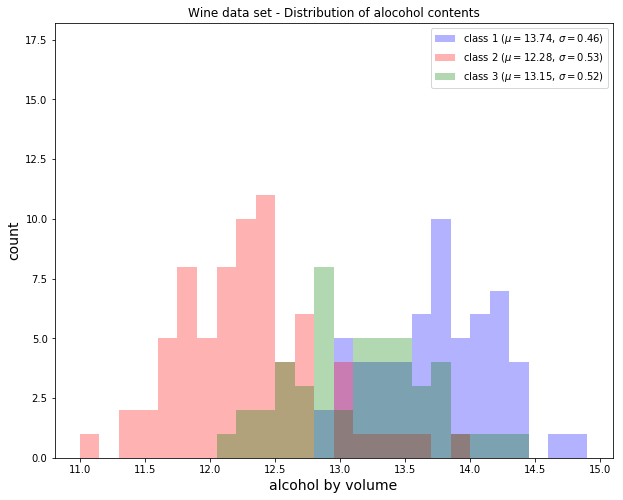

In [7]:
from matplotlib import pyplot as plt
from math import floor, ceil # for rounding up and down

plt.figure(figsize=(10,8))

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X_wine[:,0])), ceil(max(X_wine[:,0])), 0.15)

# get the max count for a particular bin for all classes combined
max_bin = max(np.histogram(X_wine[:,0], bins=bins)[0])

# the order of the colors for each histogram
colors = ('blue', 'red', 'green')

for label,color in zip(
        range(1,4), colors):

    mean = np.mean(X_wine[:,0][y_wine == label]) # class sample mean
    stdev = np.std(X_wine[:,0][y_wine == label]) # class standard deviation
    plt.hist(X_wine[:,0][y_wine == label], 
             bins=bins, 
             alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color)

plt.ylim([0, max_bin*1.3])
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

<br>
<br>

### Scatterplots

[[back to top]](#Sections)

Scatter plots are useful for visualizing features in more than just one dimension, for example to get a feeling for the correlation between particular features.  
Unfortunately, we can't plot all 13 features here at once, since the visual cortex of us humans is limited to a maximum of three dimensions.

Below, we will create an example 2D-Scatter plot from the features "Alcohol content" and "Malic acid content".  
Additionally, we will use the [`scipy.stats.pearsonr`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) function to calculate a Pearson correlation coefficient between these two features.


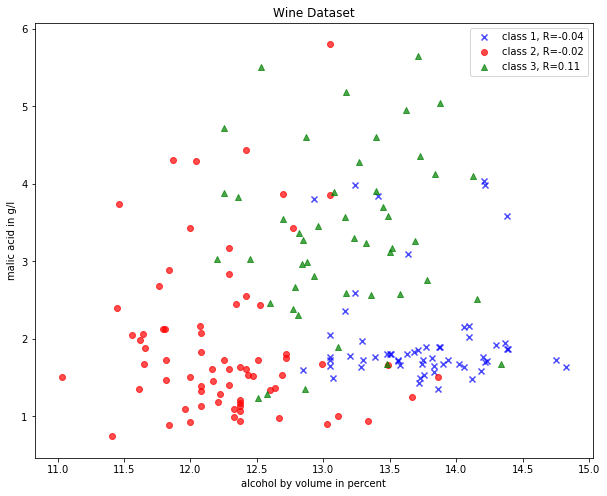

In [8]:
from scipy.stats import pearsonr

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

    # Calculate Pearson correlation coefficient
    R = pearsonr(X_wine[:,0][y_wine == label], X_wine[:,1][y_wine == label])
    plt.scatter(x=X_wine[:,0][y_wine == label], # x-axis: feat. from col. 1
                y=X_wine[:,1][y_wine == label], # y-axis: feat. from col. 2
                marker=marker, # data point symbol for the scatter plot
                color=color,
                alpha=0.7, 
                label='class {:}, R={:.2f}'.format(label, R[0]) # label for the legend
                )
    
plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()

<br>
<br>

If we want to pack 3 different features into one scatter plot at once, we can also do the same thing in 3D:

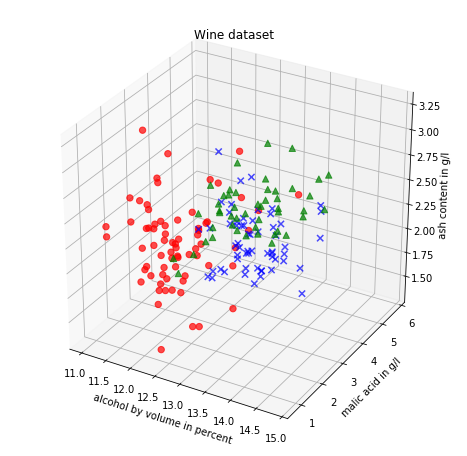

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
   
for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):
    
    ax.scatter(X_wine[:,0][y_wine == label], 
               X_wine[:,1][y_wine == label], 
               X_wine[:,2][y_wine == label],  
               marker=marker, 
               color=color, 
               s=40, 
               alpha=0.7,
               label='class {}'.format(label))

ax.set_xlabel('alcohol by volume in percent')
ax.set_ylabel('malic acid in g/l')
ax.set_zlabel('ash content in g/l')

plt.title('Wine dataset')
     
plt.show()

<br>
<br>

## Splitting into training and test dataset 

[[back to top]](#Sections)

It is a typical procedure for machine learning and pattern classification tasks to split one dataset into two: a training dataset and a test dataset.  
The training dataset is henceforth used to train our algorithms or classifier, and the test dataset is a way to validate the outcome quite objectively before we apply it to "new, real world data".

Here, we will split the dataset randomly so that 70% of the total dataset will become our training dataset, and 30% will become our test dataset, respectively.

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
     test_size=0.30, random_state=123)

/srv/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Note that since this a random assignment, the original relative frequencies for each class label are not maintained.

In [11]:
print('Class label frequencies')
        
print('\nTraining Dataset:')    
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))
    
print('\nTest Dataset:')     
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

Class label frequencies

Training Dataset:
Class 1 samples: 36.29%
Class 2 samples: 42.74%
Class 3 samples: 20.97%

Test Dataset:
Class 1 samples: 25.93%
Class 2 samples: 33.33%
Class 3 samples: 40.74%


<br>
<br>

## Feature Scaling

[[back to top]](#Sections)

### Standardization

Another important procedure is to standardize the data prior to fitting the model and other analyses so that the features will have the properties of a standard normal distribution with   

$\mu = 0$ and $\sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is especially important if we are comparing measurements that have different units, e.g., in our "wine data" example, where the alcohol content is measured in volume percent, and the malic acid content in g/l. 

In [12]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

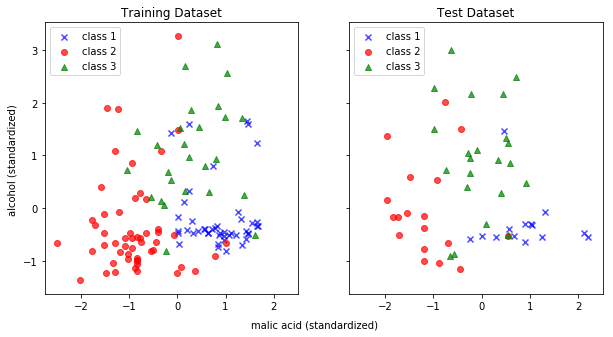

In [13]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

for a,x_dat, y_lab in zip(ax, (X_train, X_test), (y_train, y_test)):

    for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

        a.scatter(x=x_dat[:,0][y_lab == label], 
                y=x_dat[:,1][y_lab == label], 
                marker=marker, 
                color=color,   
                alpha=0.7,   
                label='class {}'.format(label)
                )

    a.legend(loc='upper left')

ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (standardized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (standardized)', ha='center', va='center', rotation='vertical')

plt.show()

<br>
<br>

<a id='Min-Max-scaling-Normalization'></a>

### Min-Max scaling (Normalization)

[[back to top]](#Sections)

An alternative approach to standardization is the so-called Min-Max scaling (sometimes also referred to as "normalization").  
In this approach, the data is scaled to a fixed range - usually 0 to 1.  
The cost of having this bounded range - in contrast to standardization - is that we will end up with small standard deviations, for example in the case where outliers are present.

The equation to calculate the "normalized" score is:

\begin{equation} X' = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

In [14]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train_minmax = minmax_scale.transform(X_train)
X_test_minmax = minmax_scale.transform(X_test)

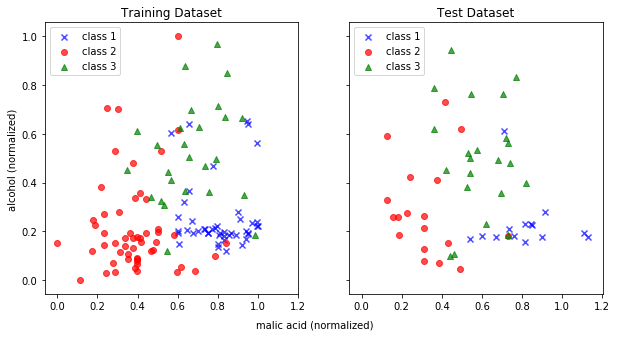

In [15]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

for a,x_dat, y_lab in zip(ax, (X_train_minmax, X_test_minmax), (y_train, y_test)):

    for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

        a.scatter(x=x_dat[:,0][y_lab == label], 
                y=x_dat[:,1][y_lab == label], 
                marker=marker, 
                color=color,   
                alpha=0.7,   
                label='class {}'.format(label)
                )

    a.legend(loc='upper left')

ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (normalized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (normalized)', ha='center', va='center', rotation='vertical')

plt.show()

<br>
<br>

<a id="PCA"></a>

## Linear Transformation: Principal Component Analysis (PCA)

[[back to top]](#Sections)

The main purposes of a principal component analysis are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.

Here, our desired outcome of the principal component analysis is to project a feature space (our dataset consisting of n x d-dimensional samples) onto a smaller subspace that represents our data "well". A possible application would be a pattern classification task, where we want to reduce the computational costs and the error of parameter estimation by reducing the number of dimensions of our feature space by extracting a subspace that describes our data "best".

If you are interested in the Principal Component Analysis in more detail, I have outlined the procedure in a separate article  
["Implementing a Principal Component Analysis (PCA) in Python step by step](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html).

Here, we will use the [`sklearn.decomposition.PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to transform our training data onto 2 dimensional subspace:

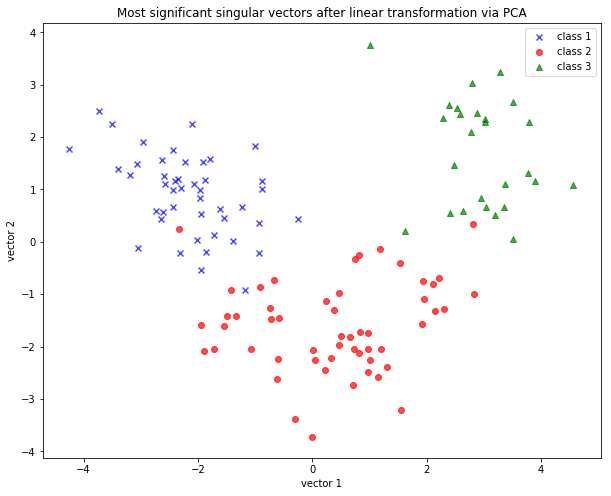

In [16]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2) # number of components to keep
sklearn_transf = sklearn_pca.fit_transform(X_train)

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

    plt.scatter(x=sklearn_transf[:,0][y_train == label],
                y=sklearn_transf[:,1][y_train == label], 
                marker=marker, 
                color=color,
                alpha=0.7, 
                label='class {}'.format(label)
                )

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via PCA')

plt.show()

<br>
<br>

#### PCA for feature extraction

As mentioned in the short introduction above (and in more detail in my separate [PCA article](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)), PCA is commonly used in the field of pattern classification for feature selection (or dimensionality reduction).  
By default, the transformed data will be ordered by the components with the maximum variance (in descending order).  

In the example above, I only kept the top 2 components (the 2 components with the maximum variance along the axes): The sample space of projected onto a 2-dimensional subspace, which was basically sufficient for plotting the data onto a 2D scatter plot.

However, if we want to use PCA for feature selection, we probably don't want to reduce the dimensionality that drastically. By default, the `PCA` function (`PCA(n_components=None)`) keeps all the components in ranked order. So we could basically either set the number `n_components` to a smaller size then the input dataset, or we could extract the top **n** components later from the returned NumPy array.

To get an idea about how well each components (relatively) "explains" the variance, we can use `explained_variance_ratio_` instant method, which also confirms that the components are ordered from most explanatory to least explanatory (the ratios sum up to 1.0).

In [17]:
sklearn_pca = PCA(n_components=None)
sklearn_transf = sklearn_pca.fit_transform(X_train)
sklearn_pca.explained_variance_ratio_

array([0.36, 0.21, 0.10, 0.08, 0.06, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01,
       0.01, 0.01])

<br>
<br>

<a id='MDA'></a>

## Linear Transformation: Linear Discriminant Analysis (MDA)

[[back to top]](#Sections)

The main purposes of a Linear Discriminant Analysis (LDA) is to analyze the data to identify patterns to project it onto a subspace that yields a better separation of the classes. Also, the dimensionality of the dataset shall be reduced with minimal loss of information.

**The approach is very similar to a Principal Component Analysis (PCA), but in addition to finding the component axes that maximize the variance of our data, we are additionally interested in the axes that maximize the separation of our classes (e.g., in a supervised pattern classification problem)**

Here, our desired outcome of the Linear discriminant analysis is to project a feature space (our dataset consisting of n d-dimensional samples) onto a smaller subspace that represents our data "well" and has a good class separation. A possible application would be a pattern classification task, where we want to reduce the computational costs and the error of parameter estimation by reducing the number of dimensions of our feature space by extracting a subspace that describes our data "best".

#### Principal Component Analysis (PCA) Vs. Linear Discriminant Analysis (LDA)

Both Linear Discriminant Analysis and Principal Component Analysis are linear transformation methods and closely related to each other. In PCA, we are interested to find the directions (components) that maximize the variance in our dataset, where in LDA, we are additionally interested to find the directions that maximize the separation (or discrimination) between different classes (for example, in pattern classification problems where our dataset consists of multiple classes. In contrast two PCA, which ignores the class labels).

**In other words, via PCA, we are projecting the entire set of data (without class labels) onto a different subspace, and in LDA, we are trying to determine a suitable subspace to distinguish between patterns that belong to different classes. Or, roughly speaking in PCA we are trying to find the axes with maximum variances where the data is most spread (within a class, since PCA treats the whole data set as one class), and in LDA we are additionally maximizing the spread between classes.**

In typical pattern recognition problems, a PCA is often followed by an LDA.

![](../Images/lda_overview.png)

If you are interested, you can find more information about the LDA in my IPython notebook   
[Stepping through a Linear Discriminant Analysis - using Python's NumPy and matplotlib](http://nbviewer.ipython.org/github/rasbt/pattern_classification/blob/master/dimensionality_reduction/projection/minear_discriminant_analysis.ipynb?create=1).

Like we did in the PCA section above, we will use a `scikit-learn` funcion, [`sklearn.lda.LDA`](http://scikit-learn.org/stable/modules/generated/sklearn.lda.LDA.html) in order to transform our training data onto 2 dimensional subspace:

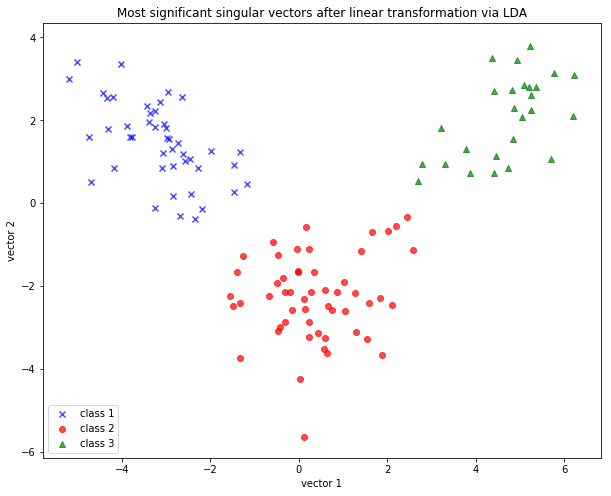

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
transf_lda = sklearn_lda.fit_transform(X_train, y_train)

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):


    plt.scatter(x=transf_lda[:,0][y_train == label],
                y=transf_lda[:,1][y_train == label], 
                marker=marker, 
                color=color,
                alpha=0.7, 
                label='class {}'.format(label)
                )

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()

#### LDA for feature extraction

If we want to use LDA for projecting our data onto a smaller subspace (i.e., for dimensionality reduction), we can directly set the number of components to keep via `LDA(n_components=...)`; this is analogous to the [PCA function](#PCA-for-feature-extraction), which we have seen above.


<br>
<br>

<br>
<br>

## Simple Supervised Classification

[[back to top]](#Sections)

<br>
<br>

### Linear Discriminant Analysis as simple linear classifier

[[back to top]](#Sections)

The LDA that we've just used in the section above can also be used as a simple linear classifier.

In [23]:
# fit model
lda_clf = LDA()
lda_clf.fit(X_train, y_train)
LDA(n_components=None, priors=None)

# prediction
print('1st sample from test dataset classified as:', lda_clf.predict(X_test[0:]))
print('actual class label:', y_test[0])

1st sample from test dataset classified as: [3 2 3 2 2 3 1 3 3 2 3 3 3 1 1 3 2 2 1 2 3 3 3 3 2 3 3 2 1 1 1 1 3 2 3 2 3
 1 2 2 3 3 1 1 1 1 1 2 1 2 2 3 3 2]
actual class label: 3


Another handy subpackage of sklearn is `metrics`. The [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), for example, is quite useful to evaluate how many samples can be classified correctly:

In [24]:
from sklearn import metrics
pred_train_lda = lda_clf.predict(X_train)

print('Prediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_lda)))

Prediction accuracy for the training dataset
100.00%


To verify that over model was not overfitted to the training dataset, let us evaluate the classifier's accuracy on the test dataset:

In [25]:
pred_test_lda = lda_clf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_lda)))

Prediction accuracy for the test dataset
98.15%


<br>
<br>

**Confusion Matrix**  
As we can see above, there was a very low misclassification rate when we'd apply the classifier on the test data set. A confusion matrix can tell us in more detail which particular classes could not classified correctly.

<table cellspacing="0" border="0">
	<colgroup width="60"></colgroup>
	<colgroup span="4" width="82"></colgroup>
	<tr>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" colspan=2 rowspan=2 height="44" align="center" bgcolor="#FFFFFF"><b><font face="Helvetica" size=4><br></font></b></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" colspan=3 align="center" bgcolor="#FFFFFF"><b><font face="Helvetica" size=4>predicted class</font></b></td>
		</tr>
	<tr>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#EEEEEE"><font face="Helvetica" size=4>class 1</font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#EEEEEE"><font face="Helvetica" size=4>class 2</font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#EEEEEE"><font face="Helvetica" size=4>class 3</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" rowspan=3 height="116" align="center" bgcolor="#F6F6F6"><b><font face="Helvetica" size=4>actual class</font></b></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#EEEEEE"><font face="Helvetica" size=4>class 1</font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#99FFCC"><font face="Helvetica" size=4>True positives</font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#F6F6F6"><font face="Helvetica" size=4><br></font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#F6F6F6"><font face="Helvetica" size=4><br></font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#EEEEEE"><font face="Helvetica" size=4>class 2</font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#FFFFFF"><font face="Helvetica" size=4><br></font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#99FFCC"><font face="Helvetica" size=4>True positives</font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#FFFFFF"><font face="Helvetica" size=4><br></font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#EEEEEE"><font face="Helvetica" size=4>class 3</font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#F6F6F6"><font face="Helvetica" size=4><br></font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#F6F6F6"><font face="Helvetica" size=4><br></font></td>
		<td style="border-top: 1px solid #c1c1c1; border-bottom: 1px solid #c1c1c1; border-left: 1px solid #c1c1c1; border-right: 1px solid #c1c1c1" align="left" bgcolor="#99FFCC"><font face="Helvetica" size=4>True positives</font></td>
	</tr>
</table>

In [26]:
print('Confusion Matrix of the LDA-classifier')
print(metrics.confusion_matrix(y_test, lda_clf.predict(X_test)))

Confusion Matrix of the LDA-classifier
[[14  0  0]
 [ 1 17  0]
 [ 0  0 22]]


As we can see, one sample from class 2 was incorrectly labeled as class 1, from the perspective of class 1, this would be 1 "False Negative" or a "False Postive" from the perspective of class 2, respectively

<br>

<a id='SGD'></a>

### Classification Stochastic Gradient Descent (SGD)

[[back to top]](#Sections)

Let us now compare the classification accuracy of the LDA classifier with a simple classification (we also use the probably not ideal default settings here) via stochastic gradient descent, an algorithm that minimizes a linear objective function.  
More information about the `sklearn.linear_model.SGDClassifier` can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

pred_train_sgd = sgd_clf.predict(X_train)
pred_test_sgd = sgd_clf.predict(X_test)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_train, pred_train_sgd)))

print('Prediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_sgd)))

print('Confusion Matrix of the SGD-classifier')
print(metrics.confusion_matrix(y_test, sgd_clf.predict(X_test)))


Prediction accuracy for the training dataset
100.00%

Prediction accuracy for the test dataset
94.44%

Confusion Matrix of the SGD-classifier
[[14  0  0]
 [ 1 17  0]
 [ 0  2 20]]


/srv/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Quite impressively, we achieved a 100% prediction accuracy on the test dataset without any additional efforts of tweaking any parameters and settings.

### Decision Regions

/srv/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


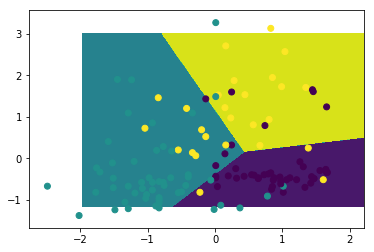

In [28]:
sgd_clf2 = SGDClassifier()
sgd_clf2.fit(X_train[:, :2], y_train)

x_min = X_test[:, 0].min()  
x_max = X_test[:, 0].max() 
y_min = X_test[:, 1].min() 
y_max = X_test[:, 1].max() 

step = 0.01
X, Y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

Z = sgd_clf2.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

# Plots decision regions
plt.contourf(X, Y, Z)


# Plots samples from training data set
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

<br>
<br>

## Saving the processed datasets

[[back to top]](#Sections)

### Pickle

[[back to top]](#Sections)

The in-built [`pickle`](https://docs.python.org/3.4/library/pickle.html) module is a convenient tool in Python's standard library to save Python objects in byte format. This allows us, for example, to save our NumPy arrays and classifiers so that we can load them in a later or different Python session to continue working with our data, e.g., to train a classifier.

In [29]:
# export objects via pickle

import pickle

pickle_out = open('standardized_data.pkl', 'wb')
pickle.dump([X_train, X_test, y_train, y_test], pickle_out)
pickle_out.close()

pickle_out = open('classifiers.pkl', 'wb')
pickle.dump([lda_clf, sgd_clf], pickle_out)
pickle_out.close()

In [30]:
# import objects via pickle

my_object_file = open('standardized_data.pkl', 'rb')
X_train, X_test, y_train, y_test = pickle.load(my_object_file)
my_object_file.close()

my_object_file = open('classifiers.pkl', 'rb')
lda_clf, sgd_clf = pickle.load(my_object_file)
my_object_file.close()

print('Confusion Matrix of the SGD-classifier')
print(metrics.confusion_matrix(y_test, sgd_clf.predict(X_test)))

Confusion Matrix of the SGD-classifier
[[14  0  0]
 [ 1 17  0]
 [ 0  2 20]]


<br>

### Comma-Separated-Values

[[back to top]](#Sections)

And it is also always a good idea to save your data in common text formats, such as the CSV format that we started with. But first, let us add back the class labels to the front column of the test and training data sets.

In [31]:
training_data = np.hstack((y_train.reshape(y_train.shape[0], 1), X_train))
test_data = np.hstack((y_test.reshape(y_test.shape[0], 1), X_test))

Now, we can save our test and training datasets as 2 separate CSV files using the [`numpy.savetxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html) function.

In [32]:
np.savetxt('./training_set.csv', training_data, delimiter=',')
np.savetxt('./test_set.csv', test_data, delimiter=',')